# ***STAGE 2 - DATA PRE-PROCESSING***

## ***Kelompok 7 - Lucky 8***

### Nama Anggota Kelompok :
1. Arif Budi Utomo;
2. M. Rivaldi Anwar Putra;
3. Natasya Indah;
4. Fathimah Azzahra Albaar;
5. Zahky Awal;
6. Dony Bagaskara;
7. Rahmawati;
8. Venessa.

# ***SOAL***

## ***1. Data Cleansing***

Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti\: <br>
A. Handle missing values <br>
B. Handle duplicated data <br>
C. Handle outliers <br>
D. Feature transformation <br>
E. Feature encoding <br>
F. Handle class imbalance <br>

Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.

* Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena akan fokus menggunakan model yang robust terhadap outlier”).

## ***2. Feature Engineering***

Cek feature yang ada sekarang, lalu lakukan: <br>
A. Feature selection (membuang feature yang kurang relevan atau redundan) <br>
B. Feature extraction (membuat feature baru dari feature yang sudah ada) <br>
C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan) <br>

* Untuk 2A & 2B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)

# ***JAWABAN***

## ***Import Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling

print('Numpy Version : ', np.__version__)
print('Pandas Version : ', pd.__version__)
print('Seaborn Version : ', sns.__version__)

Numpy Version :  1.23.4
Pandas Version :  1.5.2
Seaborn Version :  0.12.1


### ***Mengubah Parameter Default Matpotlib***

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## ***Load Dataset***

In [3]:
df = pd.read_csv('mc_eda.csv')

In [4]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_amount_spent,Total_accept_campaign
1470,5286,1987,Master,Single,41020.0,0,0,2013-10-28,68,112,...,0,0,0,0,3,11,0,33,105,0
178,6935,1951,Master,Married,78497.0,0,0,2013-12-01,44,207,...,0,1,0,0,3,11,0,69,771,1
453,3225,1984,Master,Married,42207.0,1,0,2013-04-01,71,116,...,0,0,0,0,3,11,1,36,149,1
1468,217,1956,Master,Single,64857.0,0,0,2012-11-23,78,556,...,0,0,0,0,3,11,0,64,984,0
2139,10609,1962,PhD,Married,42769.0,0,1,2013-10-12,15,71,...,0,0,0,0,3,11,0,58,17,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2229 non-null   int64  
 1   Year_Birth             2229 non-null   int64  
 2   Education              2229 non-null   object 
 3   Marital_Status         2229 non-null   object 
 4   Income                 2229 non-null   float64
 5   Kidhome                2229 non-null   int64  
 6   Teenhome               2229 non-null   int64  
 7   Dt_Customer            2229 non-null   object 
 8   Recency                2229 non-null   int64  
 9   MntWines               2229 non-null   int64  
 10  MntFruits              2229 non-null   int64  
 11  MntMeatProducts        2229 non-null   int64  
 12  MntFishProducts        2229 non-null   int64  
 13  MntSweetProducts       2229 non-null   int64  
 14  MntGoldProds           2229 non-null   int64  
 15  NumD

Pengamatan\:
1. Data terdiri dari `2229` baris;
2. Sudah tidak ada nilai null di setiap kolom (`Non-Null Count < jumlah baris`), nilai null sudah dihandle saat EDA kemarin; dan
3. Sepertinya terdapat issue yang mencolok pada tipe data untuk kolom `Dt_Customer`, seharusnya tipe datanya bukan object namun `datetime`.
4. Kolom bertipe kategori : `'Education'` dan `'Marital_Status'`, nanti akan `diencoding`.
5. Kolom `'Kidhome'` dan `'Teenhome'` akan kami jadikan satu untuk meringkas dimensi.
6. Kolom `'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'` (atau kedepannya akan kita sebut `himpunan kolom 'amount_spent'`) dan kolom `'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'` (atau kedepannya akan kita sebut `himpunan kolom 'cmp'`) telah kami gabungkan menjadi `'Total_accept_campaign'` saat EDA kemarin.
7. Kolom `'Year_birth'` juga telah kita rubah menjadi kolom `'Age'` saat EDA kemarin.

## ***Feature Extraction (2.B)***

In [6]:
# Mengcopy Dataset
dfa = df.copy()

In [7]:
# Merubah tipe data Dt_Customer
dfa['Dt_Customer']= pd.to_datetime(dfa['Dt_Customer'])


dfa['Year'] = dfa["Dt_Customer"].dt.year
dfa['Month'] = dfa["Dt_Customer"].dt.month

In [8]:
# Menggabungkan kolom Kidhome dan Teenhome menjadi children
dfa['children'] = dfa['Kidhome'] + dfa['Teenhome']

## ***Feature Encoding (1.E)***

***Pengelompokkan Kolom***

In [9]:
# pengelompokan kolom berdasarkan jenisnya

cats = ['Education', 'Marital_Status']
nums = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','Age','Total_amount_spent', 'Total_accept_campaign']
timestamp = ['Dt_Customer']


# pengelompokkan lebih spesifik untuk 'nums'

amount_spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
cmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
others1 = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency']
others2 = ['Complain', 'NumWebVisitsMonth', 'Age', 'Total_amount_spent', 'Total_accept_campaign']
dt_cust = ['Year', 'Month']

In [10]:
# Melihat value unique kolom Education dan Marital_Status
for col in cats:
  print(f'value counts of column {col}')
  print(dfa[col].value_counts())
  print('---'*10, '\n')

value counts of column Education
Graduation    1124
Master         570
PhD            481
Basic           54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Married     861
Together    577
Single      484
Divorced    307
Name: Marital_Status, dtype: int64
------------------------------ 



Pengamatan : <br>
1. Kolom `'Education'` memiliki nilai bertingkat (tipe ordinal), maka untuk proses encodingnya menggunakan `Label Encoding`; dan
2. Kolom `'Marital_Status'` memiliki nilai yang tidak bertingkat (tipe nominal), maka untuk proses encodingnya menggunakan `One Hot Encoder`.

In [11]:
# Mapping Education
mapping_education = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3
}

dfa['Education'] = dfa['Education'].map(mapping_education)

In [12]:
# One hot encoder Marital_Status
# WARNING: run code ini sekali saja
onehots = pd.get_dummies(dfa['Marital_Status'], prefix='Status')
dfa = dfa.join(onehots)

In [13]:
# Melihat keberhasilan feature encoding dan extraction
dfa.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Age,Total_amount_spent,Total_accept_campaign,Year,Month,children,Status_Divorced,Status_Married,Status_Single,Status_Together
291,10451,1965,1,Together,29672.0,1,1,2013-03-12,6,9,...,55,16,0,2013,3,2,0,0,0,1
1857,4227,1968,2,Together,32889.0,1,1,2013-09-06,78,28,...,52,27,0,2013,9,2,0,0,0,1
2179,1646,1972,0,Married,25224.0,1,0,2014-03-16,36,4,...,48,42,0,2014,3,1,0,1,0,0
180,3559,1988,2,Married,16248.0,1,0,2014-05-10,77,12,...,32,45,0,2014,5,1,0,1,0,0
487,22,1976,1,Divorced,46310.0,1,0,2012-12-03,99,185,...,44,124,0,2012,12,1,1,0,0,0


## ***Feature Selection (2.A)***

Untuk membuat model prediction response customer terhadap campaign yang akan datang, maka kami memutuskan untuk melakukan hal berikut :
1. kolom `'Year_Birth'` akan kami hapus, dan kami akan memakai kolom `'Age'` saja;
2. Kolom `'ID', 'Z_CostContact'`, dan `'Z_Revenue'` akan kami drop karena tidak berguna dalam memprediksi response;
3. Kolom `'Total_accept_campaign'` akan kami pakai, dan himpunan kolom `'cmp'` akan kita drop;
4. Kolom `'Kidhome'` dan `'Teenhome'` kita akan hapus karena sudah disatukan menjadi kolom `'child'`;
5. Kolom `'Dt-Customer'` kami juga akan drop, hanya  memakai kolom `'Year'` saja, sedangkan kolom `'Month'` akan kami hapus juga;
6. Kolom `'Total_amount_spent'` kami akan pakai, sedangkan himpunan `'amount_spent`' nya akan kami drop; dan
7. Kolom `'Marital_Status'` juga kami drop karena sudah di encoding.

In [14]:
# Menghapus kolom yang tidak akan digunakan
dfa = dfa.drop(columns = ['ID', 'Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Z_CostContact', 'Z_Revenue', 'Month'])

In [15]:
# Melihat keberhasilan feature Selection
dfa.sample(5)

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_amount_spent,Total_accept_campaign,Year,children,Status_Divorced,Status_Married,Status_Single,Status_Together
697,2,41335.0,24,3,4,1,4,7,0,0,52,75,0,2013,1,1,0,0,0
1121,0,16581.0,51,1,0,0,3,4,0,0,35,23,0,2013,0,0,0,1,0
2092,3,67911.0,63,3,6,7,11,3,0,0,71,447,0,2014,1,0,0,0,1
1271,1,71847.0,95,0,6,7,9,3,0,0,42,455,1,2012,0,1,0,0,0
139,3,36921.0,74,2,2,0,3,7,0,0,55,21,0,2013,2,1,0,0,0


## ***Split Data Train dan Test***

Untuk memulai sesi Pre-processing, kami akan memisahkan data Train dan Test terlebih dahulu. Dan yang akan kami pre-processing adalah data train saja.

In [16]:
# Melakukan Split Dataset
train, test = train_test_split(dfa, test_size=0.3, random_state=42)

In [17]:
# Melihat jumlah data train
train.shape

(1560, 19)

In [18]:
# Melihat jumlah data train
test.shape

(669, 19)

In [19]:
train.to_csv('mc_train.csv')
test.to_csv('mc_test.csv')

## ***Handling Missing Value (1.A)***

In [20]:
# Melihat Info tipe data pada data Train
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 2057 to 860
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              1560 non-null   int64  
 1   Income                 1560 non-null   float64
 2   Recency                1560 non-null   int64  
 3   NumDealsPurchases      1560 non-null   int64  
 4   NumWebPurchases        1560 non-null   int64  
 5   NumCatalogPurchases    1560 non-null   int64  
 6   NumStorePurchases      1560 non-null   int64  
 7   NumWebVisitsMonth      1560 non-null   int64  
 8   Complain               1560 non-null   int64  
 9   Response               1560 non-null   int64  
 10  Age                    1560 non-null   int64  
 11  Total_amount_spent     1560 non-null   int64  
 12  Total_accept_campaign  1560 non-null   int64  
 13  Year                   1560 non-null   int64  
 14  children               1560 non-null   int64  
 15  St

In [21]:
# Melihat sample data train
train.sample(5)

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_amount_spent,Total_accept_campaign,Year,children,Status_Divorced,Status_Married,Status_Single,Status_Together
1915,1,80982.0,48,3,11,5,11,5,1,0,61,686,0,2013,2,0,0,1,0
1101,2,65463.0,17,2,6,2,9,5,0,0,46,171,1,2014,1,0,1,0,0
1337,1,33249.0,11,2,2,1,3,6,0,0,45,106,0,2013,1,0,0,1,0
1331,1,39660.0,36,3,7,1,3,9,0,1,38,160,0,2012,1,0,0,1,0
133,1,51381.5,96,1,6,5,7,4,0,0,57,494,0,2013,1,0,1,0,0


In [22]:
# Melihat jumlah nilai Null pada data Train
train.isna().sum()

Education                0
Income                   0
Recency                  0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
Complain                 0
Response                 0
Age                      0
Total_amount_spent       0
Total_accept_campaign    0
Year                     0
children                 0
Status_Divorced          0
Status_Married           0
Status_Single            0
Status_Together          0
dtype: int64

Dari data diatas, sudah tidak terdapat kolom yang memiliki `'Missing Values'` dan bentuk data sudah sesuai.

## ***Handling Duplicated Data (1.B)***

In [23]:
print('jumlah data duplikat :', train.duplicated().sum())

#drop data duplikat
train_clean = train.drop_duplicates()

#periksa data duplikat
print('terdapat data duplikat :', train_clean.duplicated().sum())

jumlah data duplikat : 92
terdapat data duplikat : 0


Terdapat `92 data duplikat` pada data train kami, maka kami melakukan drop data duplikat. Setelah kami melakukan handling data duplikat, jumlah data yang semula ada `1.560 data`, sekarang menjadi `1.462 data`. 

## ***Handling Outliers (1.C)***

In [24]:
#pengelompokkan kolom berdasarkan jenis
cats = ['Education', 'Status_Divorced', 'Status_Married', 'Status_Single', 'Status_Together']
nums = ['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
        'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Total_amount_spent', 'Total_accept_campaign',
        'Year', 'children']
boolean = ['Complain', 'Response']

### 1. Melihat Outliers pada kategori nums

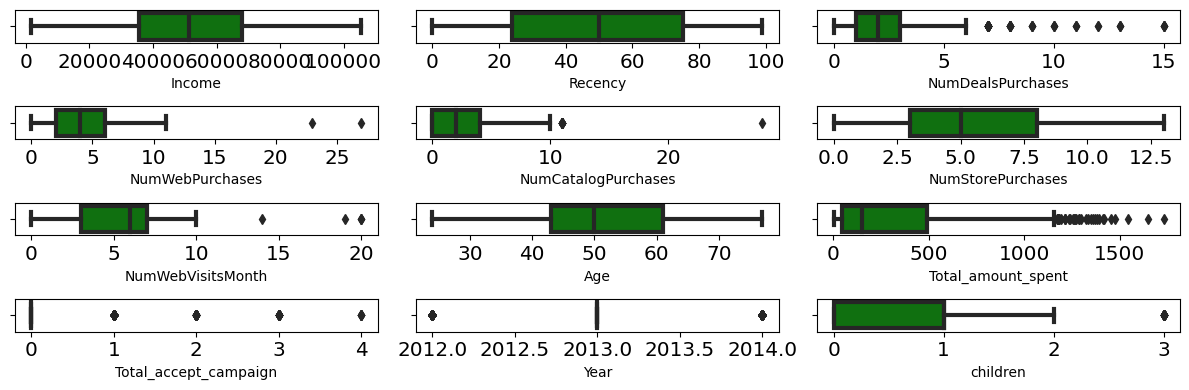

In [25]:
for i in range (0, len(nums)) :
    plt.subplot(4,3, i+1)
    sns.boxplot(x=train_clean[nums[i]], color='green')
    plt.tight_layout()
    rcParams['figure.figsize'] = 15.7,15.7

Dari grafik box plot di atas terlihat bahwa, feature yang memiliki data outlier yang ekstrem adalah `'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'Total_amount_spent'`, dan `'children'`.

### 2. Menghapus Outliers pada kategori nums

In [26]:
from scipy import stats
outliers= ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth',
           'Total_amount_spent', 'children']

print(f'Jumlah baris sebelum memfilter outliers: {len(train_clean)}')

filtered_entries = np.array([True] * len(train_clean))

for col in outliers:
    zscore = abs(stats.zscore(train_clean[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
train_clean = train_clean[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outliers: {len(train_clean)}')

Jumlah baris sebelum memfilter outliers: 1468
Jumlah baris setelah memfilter outliers: 1431


Setelah melakukan handling outliers, terlihat bahwa dari data train kami memiliki outlier sebanyak `37 outlier`. Sehingga data train kami yang baru yang sebelumnya memiliki `1.468 data`, saat ini menjadi `1.431 data`.

## *Feature Transformation (1.D)*

In [27]:
# Melihat statistic descriptif data train
train_clean[nums].describe()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_amount_spent,Total_accept_campaign,Year,children
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000
mean,51529.376310,49.508036,2.231307,4.037736,2.638015,5.791754,5.315863,51.200559,293.749825,0.283718,2013.034242,0.945493
std,20205.939251,29.201131,1.575254,2.608480,2.768516,3.234640,2.292772,11.787674,321.087116,0.659948,0.677987,0.744090
min,7500.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,24.000000,1.000000,0.000000,2012.000000,0.000000
25%,35533.500000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,43.000000,42.000000,0.000000,2013.000000,0.000000
50%,51381.500000,50.000000,2.000000,3.000000,2.000000,5.000000,6.000000,50.000000,140.000000,0.000000,2013.000000,1.000000
75%,67751.000000,75.500000,3.000000,6.000000,4.000000,8.000000,7.000000,61.000000,481.500000,0.000000,2013.000000,1.000000
max,105471.000000,99.000000,8.000000,11.000000,11.000000,13.000000,10.000000,77.000000,1296.000000,4.000000,2014.000000,3.000000


### 1. Persebaran Sebelum Transformasi

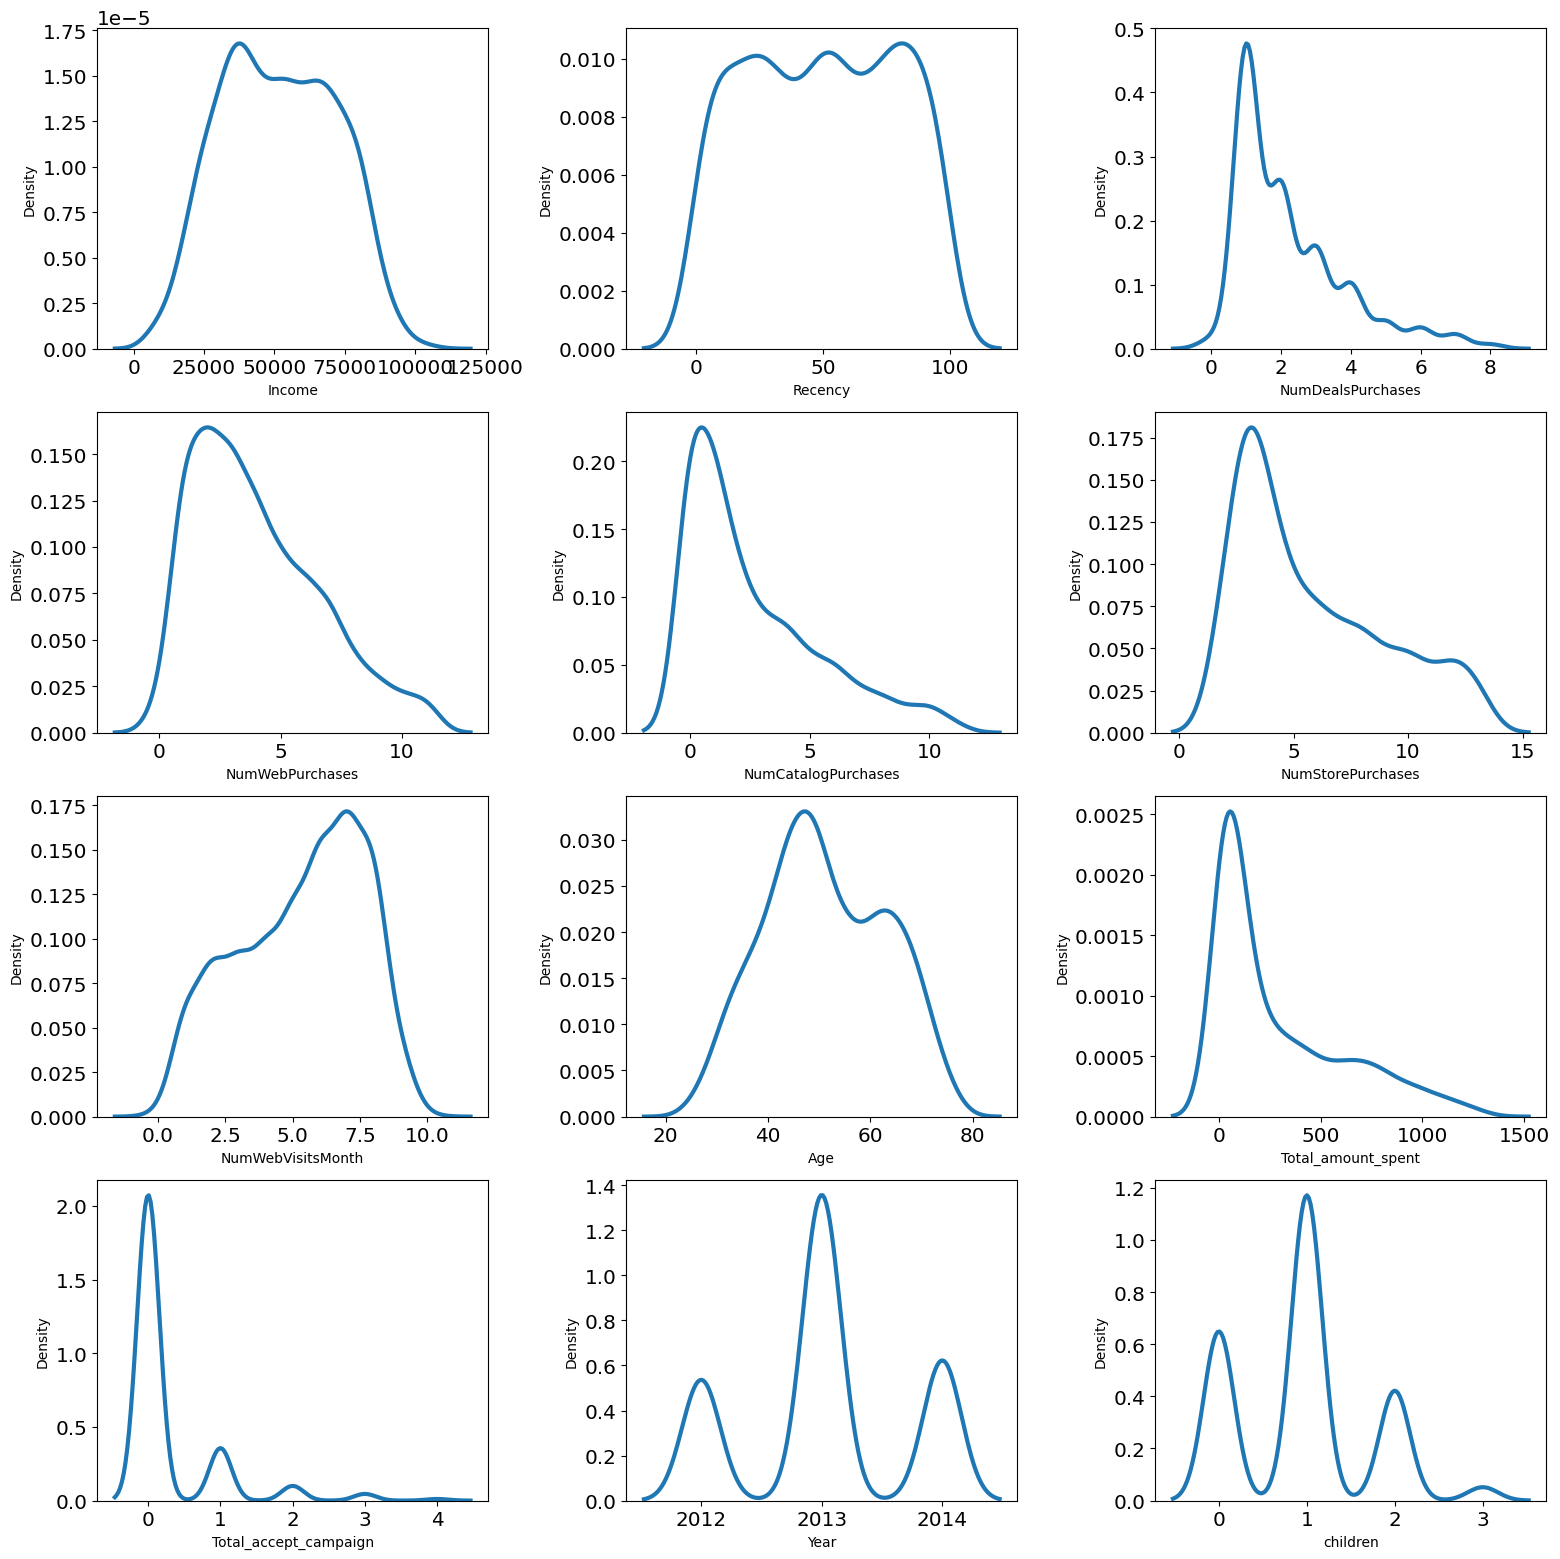

In [28]:
sebelum_trans = ['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth','Age', 'Total_amount_spent', 'Total_accept_campaign', 'Year', 'children']
for i in range (0, len(sebelum_trans)) :
    plt.subplot(4,3, i+1)
    sns.kdeplot(x=train_clean[sebelum_trans[i]])
    plt.tight_layout()
    rcParams['figure.figsize'] = 15.7,15.7

Dari grafik masing-masing kolom kategori `nums` diatas, dapat diketahui bahwa:
- Kolom `'NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases,Total_amount_spent`, dan `Total_accept_campaign'` memiliki distribusi data yang cenderung `right skewed` dimana `mean > median`. Selanjutnya akan dilakukan ***`standarisasi`***; dan
- Kolom `'Year` dan `children'` memiliki multimodal distribution atau memiliki beberapa peak dalam distribusinya.

### 2. Standardization

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Melakukan standarisasi pada data train
train_clean['NumDealsPurchases'] = StandardScaler().fit_transform(train_clean['NumDealsPurchases'].values.reshape(len(train_clean), 1))
train_clean['NumWebPurchases'] = StandardScaler().fit_transform(train_clean['NumWebPurchases'].values.reshape(len(train_clean), 1))
train_clean['NumCatalogPurchases'] = StandardScaler().fit_transform(train_clean['NumCatalogPurchases'].values.reshape(len(train_clean), 1))
train_clean['NumStorePurchases'] = StandardScaler().fit_transform(train_clean['NumStorePurchases'].values.reshape(len(train_clean), 1))
train_clean['Total_amount_spent'] = StandardScaler().fit_transform(train_clean['Total_amount_spent'].values.reshape(len(train_clean), 1))

In [30]:
test_fix = test.copy()
# Melakukan standarisasi pada data test juga
test_fix['NumDealsPurchases'] = StandardScaler().fit_transform(test_fix['NumDealsPurchases'].values.reshape(len(test_fix), 1))
test_fix['NumWebPurchases'] = StandardScaler().fit_transform(test_fix['NumWebPurchases'].values.reshape(len(test_fix), 1))
test_fix['NumCatalogPurchases'] = StandardScaler().fit_transform(test_fix['NumCatalogPurchases'].values.reshape(len(test_fix), 1))
test_fix['NumStorePurchases'] = StandardScaler().fit_transform(test_fix['NumStorePurchases'].values.reshape(len(test_fix), 1))
test_fix['Total_amount_spent'] = StandardScaler().fit_transform(test_fix['Total_amount_spent'].values.reshape(len(test_fix), 1))

### 3. Normalization

In [31]:
# Melakukan normalization pada data train
train_clean['Income'] = MinMaxScaler().fit_transform(train_clean['Income'].values.reshape(len(train_clean), 1))
train_clean['Recency'] = MinMaxScaler().fit_transform(train_clean['Recency'].values.reshape(len(train_clean), 1))
train_clean['NumWebVisitsMonth'] = MinMaxScaler().fit_transform(train_clean['NumWebVisitsMonth'].values.reshape(len(train_clean), 1))
train_clean['Age'] = MinMaxScaler().fit_transform(train_clean['Age'].values.reshape(len(train_clean), 1))
train_clean['Total_accept_campaign'] = MinMaxScaler().fit_transform(train_clean['Total_accept_campaign'].values.reshape(len(train_clean), 1))
train_clean['Year'] = MinMaxScaler().fit_transform(train_clean['Year'].values.reshape(len(train_clean), 1))
train_clean['children'] = MinMaxScaler().fit_transform(train_clean['children'].values.reshape(len(train_clean), 1))

In [32]:
# Melakukan normalization pada data test juga
test_fix['Income'] = MinMaxScaler().fit_transform(test_fix['Income'].values.reshape(len(test_fix), 1))
test_fix['Recency'] = MinMaxScaler().fit_transform(test_fix['Recency'].values.reshape(len(test_fix), 1))
test_fix['NumWebVisitsMonth'] = MinMaxScaler().fit_transform(test_fix['NumWebVisitsMonth'].values.reshape(len(test_fix), 1))
test_fix['Age'] = MinMaxScaler().fit_transform(test_fix['Age'].values.reshape(len(test_fix), 1))
test_fix['Total_accept_campaign'] = MinMaxScaler().fit_transform(test_fix['Total_accept_campaign'].values.reshape(len(test_fix), 1))
test_fix['Year'] = MinMaxScaler().fit_transform(test_fix['Year'].values.reshape(len(test_fix), 1))
test_fix['children'] = MinMaxScaler().fit_transform(test_fix['children'].values.reshape(len(test_fix), 1))

### 4. Persebaran Setelah Transformasi

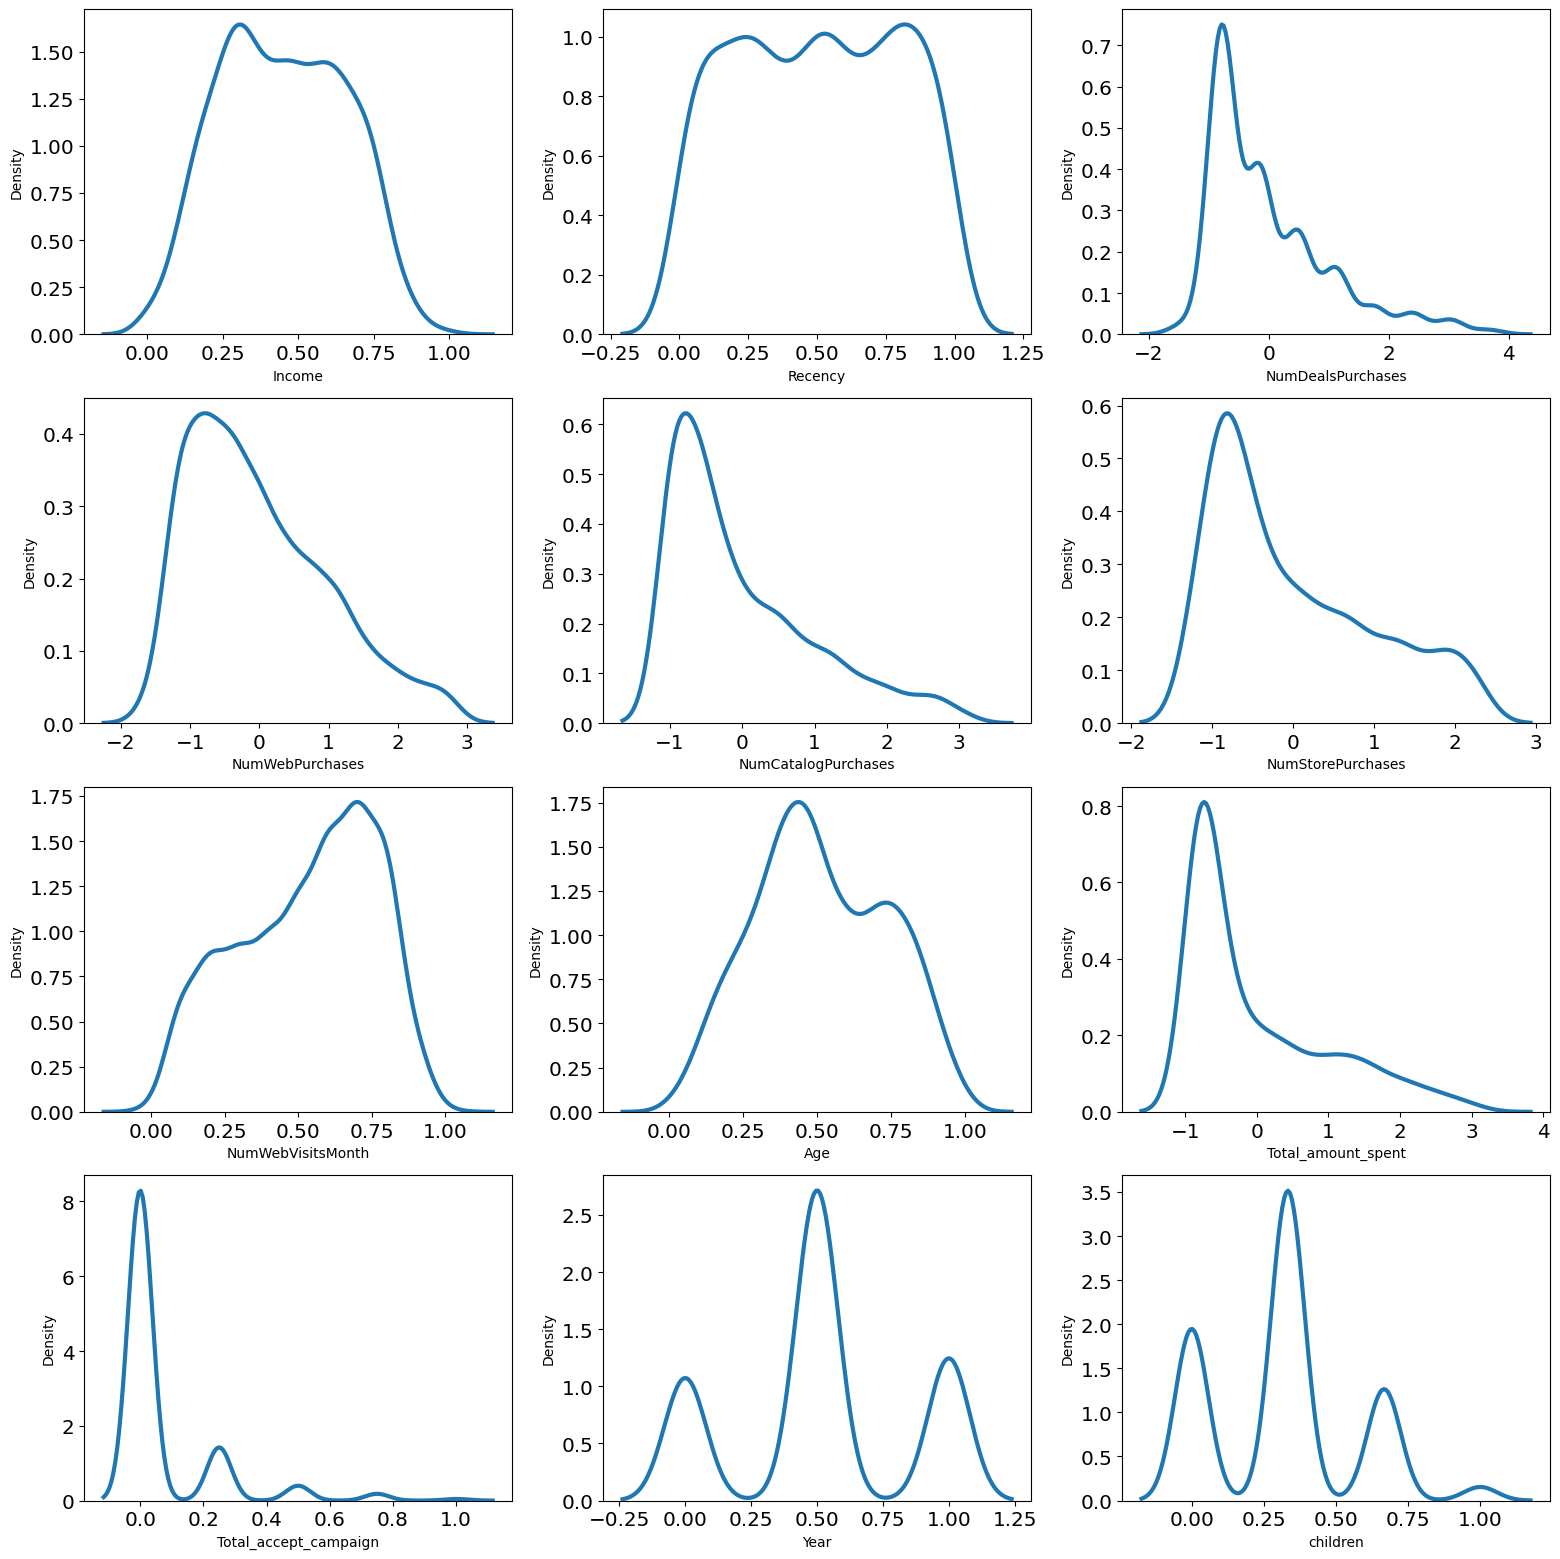

In [33]:
sesudah_trans = ['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth','Age', 'Total_amount_spent', 'Total_accept_campaign', 'Year', 'children']
for i in range (0, len(sesudah_trans)) :
    plt.subplot(4,3, i+1)
    sns.kdeplot(x=train_clean[sesudah_trans[i]])
    plt.tight_layout()
    rcParams['figure.figsize'] = 15.7,15.7

In [34]:
# lihat data train setelah di transformasi
pd.pandas.set_option('display.max_columns', None)
train_clean.describe()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_amount_spent,Total_accept_campaign,Year,children,Status_Divorced,Status_Married,Status_Single,Status_Together
count,1431.000000,1431.000000,1431.000000,1.431000e+03,1.431000e+03,1.431000e+03,1.431000e+03,1431.000000,1431.000000,1431.000000,1431.000000,1.431000e+03,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000
mean,1.649196,0.449412,0.500081,-6.330832e-17,-1.837182e-16,8.689377e-17,-2.482679e-18,0.531586,0.006988,0.148847,0.513218,5.958430e-17,0.070929,0.517121,0.315164,0.143256,0.375961,0.214535,0.266247
std,0.844520,0.206244,0.294961,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,0.229277,0.083332,0.356062,0.222409,1.000350e+00,0.164987,0.338993,0.248030,0.350457,0.484539,0.410643,0.442150
min,0.000000,0.000000,0.000000,-1.416970e+00,-1.548468e+00,-9.531958e-01,-1.172643e+00,0.000000,0.000000,0.000000,0.000000,-9.120645e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.286141,0.242424,-7.819293e-01,-7.814697e-01,-9.531958e-01,-8.633820e-01,0.300000,0.000000,0.000000,0.358491,-7.843287e-01,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.447903,0.505051,-1.468891e-01,-3.979707e-01,-2.305345e-01,-2.448590e-01,0.600000,0.000000,0.000000,0.490566,-4.790089e-01,0.000000,0.500000,0.333333,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.614988,0.762626,4.881511e-01,7.525263e-01,4.921268e-01,6.829254e-01,0.700000,0.000000,0.000000,0.698113,5.849372e-01,0.000000,0.500000,0.333333,0.000000,1.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,3.663352e+00,2.670021e+00,3.021441e+00,2.229233e+00,1.000000,1.000000,1.000000,1.000000,3.122519e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# lihat data test setelah di transformasi
pd.pandas.set_option('display.max_columns', None)
test_fix.describe()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_amount_spent,Total_accept_campaign,Year,children,Status_Divorced,Status_Married,Status_Single,Status_Together
count,669.000000,669.000000,669.000000,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,669.000000,669.000000,669.000000,669.000000,6.690000e+02,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000
mean,1.696562,0.434500,0.485090,7.169153e-17,-5.974294e-17,3.319052e-17,1.792288e-17,0.279758,0.014948,0.147982,0.478886,6.372581e-17,0.080344,0.512706,0.319880,0.136024,0.406577,0.222720,0.234679
std,0.829293,0.191115,0.286879,1.000748e+00,1.000748e+00,1.000748e+00,1.000748e+00,0.124809,0.121434,0.355348,0.204907,1.000748e+00,0.177807,0.349598,0.246705,0.343070,0.491562,0.416384,0.424115
min,0.000000,0.000000,0.000000,-1.257338e+00,-1.437581e+00,-9.456879e-01,-1.806516e+00,0.000000,0.000000,0.000000,0.000000,-8.789515e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.280747,0.242424,-7.072015e-01,-7.456805e-01,-9.456879e-01,-8.768553e-01,0.210526,0.000000,0.000000,0.339286,-7.694809e-01,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.431666,0.494949,-1.570645e-01,-5.378001e-02,-2.061611e-01,-2.570812e-01,0.315789,0.000000,0.000000,0.464286,-4.562732e-01,0.000000,0.500000,0.333333,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.582330,0.727273,3.930724e-01,6.381205e-01,5.333657e-01,6.725800e-01,0.368421,0.000000,0.000000,0.642857,5.198401e-01,0.000000,1.000000,0.333333,0.000000,1.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,6.994716e+00,7.903076e+00,3.121710e+00,2.222015e+00,1.000000,1.000000,1.000000,1.000000,3.277892e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <b>Data Imbalance (1. F)<b>

### 1. Pemisahan Feature dan Target

In [36]:
# Pemisahan Feature dan Target pada data Train
X_train = train_clean[[col for col in train_clean.columns if col not in ['Response']]].values
y_train = train_clean['Response']
print(X_train.shape)
print(y_train.shape)
print(pd.Series(y_train).value_counts())

(1431, 18)
(1431,)
0    1218
1     213
Name: Response, dtype: int64


In [37]:
# Pemisahan Feature dan Target pada data Test
X_test = test_fix[[col for col in test_fix.columns if col not in ['Response']]].values
y_test = test_fix['Response']
print(X_test.shape)
print(y_test.shape)
print(pd.Series(y_test).value_counts())

(669, 18)
(669,)
0    570
1     99
Name: Response, dtype: int64


Dikarenakan jumlah response positif yang `rendah`, kami akan melakukan metode oversampling `SMOTE` untuk memperbanyak data response positif, karena dengan metode `SMOTE`. data akan diperbanyak dengan data sintetis.

### 2. Handling Data Imbalance

In [38]:
from imblearn import under_sampling, over_sampling
X_train_over_SMOTE, y_train_over_SMOTE = over_sampling.SMOTE(sampling_strategy = 'auto').fit_resample(X_train, y_train)
print('SMOTE')
print(y_train_over_SMOTE.value_counts())

SMOTE
0    1218
1    1218
Name: Response, dtype: int64


## <b> Feature Tambahan (2. C) <b>

Menurut kami, dataset ini akam lebih `'Lengkap'` jika ada feature-featur di bawah ini : <b>
1. `'Gender'`;
2. `'Metode Pembayaran'`;
3. `'Job'`; dan
4. `'Kenegaraan'`.

In [41]:
# Menyimpan file X dan y
np.savetxt('mc_x_train.csv', X_train_over_SMOTE, delimiter=",")
np.savetxt('mc_y_train.csv', y_train_over_SMOTE, delimiter=",")
np.savetxt('mc_x_test.csv', X_test, delimiter=",")
np.savetxt('mc_y_test.csv', y_test, delimiter=",")